# <center>GENDER RECOGNITION</center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
   - **8.1** [**Model Development & Evaluation without tuning**](#Section81)<br>
   - **8.2** [**Hyperparameter Tuning of Models**](#Section82)<br>
   - **8.3** [**Implement Model on test data**](#Section83)<br>
   
 
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  

---
<a name = Section1></a>
# **1. Introduction**
---
Client are a leading telecom company with 5 million users.
They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
They want to automate the process of keeping track of male and female users using their voice.
Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.
<center><img src="https://www.insaid.co/wp-content/uploads/2021/05/gender-recognition-logo.jpg"></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.
Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.
However, designing a computer program to do this turns out to be a bit trickier.
Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
!pip install pydotplus

In [2]:
import mysql.connector
import os
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix

#-------------------------------------------------------------------------------------------------------------------------------
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
import sweetviz as svz

from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of the information about **Human Voice Frequncy**.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2851 | 22 | 718 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|1|Id|Unique Id|
|2|meanfreq|Mean frequency (in kHz) for the voice sample|
|3|sd|Standard deviation of the frequency|
|4|median|Median frequency (in kHz) for the voice sample|
|5|Q25|First quantile (in kHz)|
|6|Q75|Third quantile (in kHz)|
|7|IQR|Interquartile range (in kHz)|
|8|skew|Skewness of the voice sample|
|9|kurt|Kurtosis of the voice sample|
|10|sp.ent|Spectral entropy|
|11|sfm|Spectral flatness of the voice sample|
|12|mode|Mode frequency|
|13|centroid|Frequency centroid|
|14|peakf|Peak frequency (the frequency with the highest energy)|
|15|meanfun|Average of fundamental frequency measured across the acoustic signal|
|16|minfun|Minimum fundamental frequency measured across the acoustic signal|
|17|maxfun|Maximum fundamental frequency measured across the acoustic signal|
|18|meandom|Average of dominant frequency measured across the acoustic signal|
|19|mindom|Minimum of dominant frequency measured across the acoustic signal|
|20|maxdom|Maximum of dominant frequency measured across the acoustic signal|
|21|dfrange|Range of dominant frequency measured across the acoustic signal|
|22|modindx|Modulation index. Calculated as the accumulated absolute difference between adjacent Measurements of fundamental frequencies divided by the frequency range|
|23|label|The label for the voice sample (male or female)|


- Load The Data

In [3]:
train_df=pd.read_csv("D:/Insaid/Machine Learning/Term_Project_2/voice_train.csv")
train_df.head()


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


<a name = Section41></a>
### **4.1 Data Description**

In [4]:
train_df.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,0.408473,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,0.176880,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,0.259191,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,0.396548,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,0.533495,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
train_df.skew()

Id         -0.001228
meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64

<a name = Section42></a>
### **4.2 Data Information**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

- There are no missing values in data set

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

In [7]:
import sweetviz as sv

In [8]:
# sweet_report = sv.analyze(train_df)
# sweet_report.show_html('sweet_report.html')

In [9]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

- No Missing Values in Dataset 
- There are no Duplicate values

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

Text(0.5, 1.0, 'Correlation Between Feature')

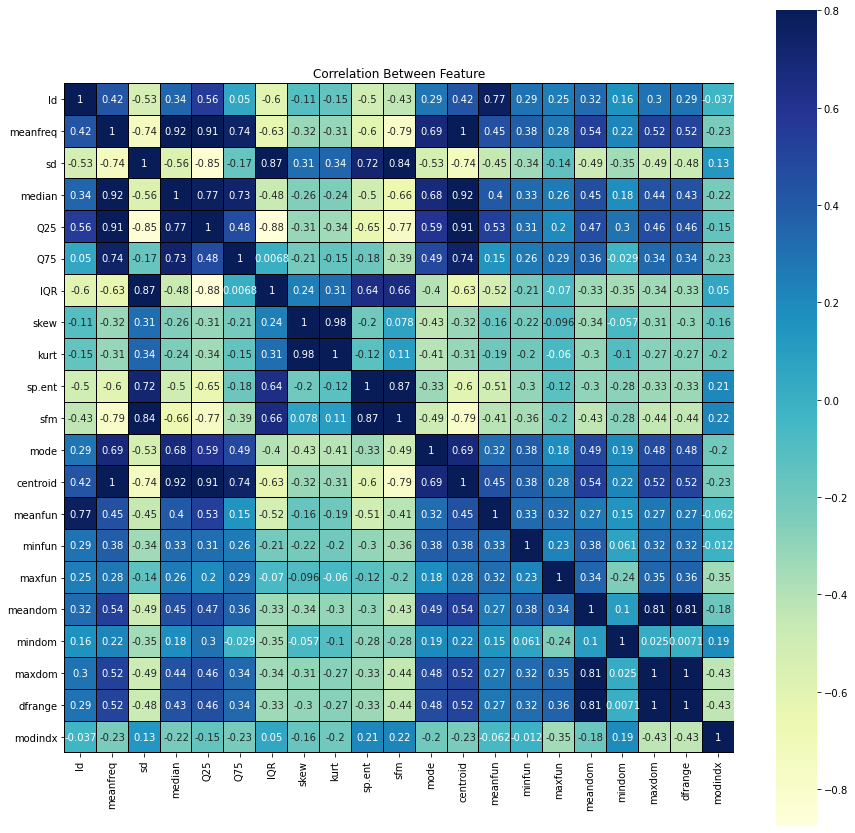

In [10]:
corr = train_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr , vmax=0.8 , linewidths=.01 , square=True , annot=True , cmap='YlGnBu',linecolor ='black')
plt.title('Correlation Between Feature')

## Count Plot For The Dependend Variable

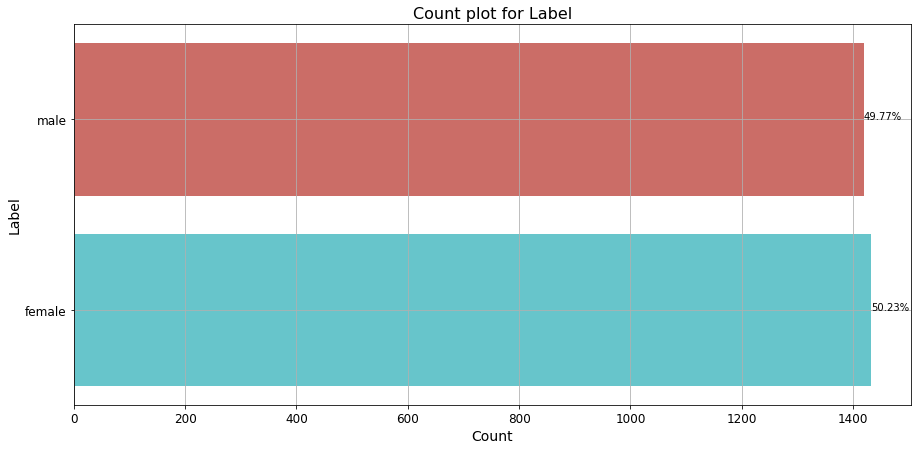

In [11]:
fig = plt.figure(figsize=[15,7])

# Create a countplot for lable feature
ax = sns.countplot(y='label' , data=train_df , palette='hls')

# Adding percentage to the bars
total=train_df.shape[0]

for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_width()/total)
    x=p.get_x() + p.get_width()
    y=p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x,y))
    
# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Label', size=14)
plt.title(label="Count plot for Label", size=16)
plt.grid(b=True)

# Display the output
plt.show()

- We can see that Male and Female both are have almost same count

## Plot a histogram grid of the numeric features

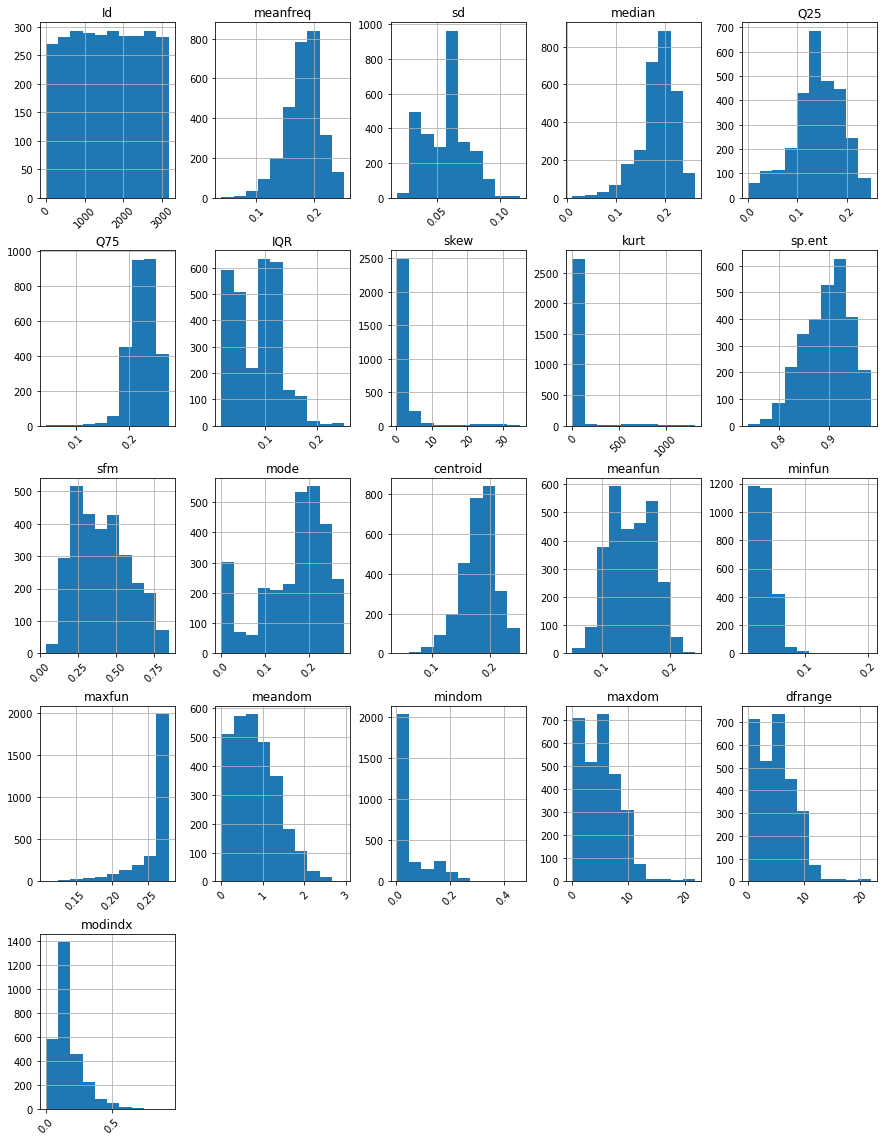

In [17]:
train_df.hist(figsize=(15,20), xrot=45)
plt.show()

## How Does ''meandom" Variable playes important role on Dependant Variable "label"

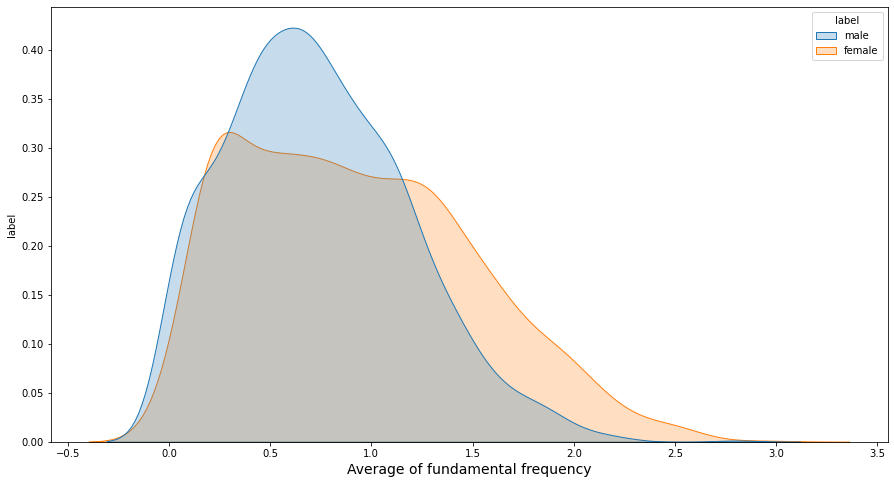

In [45]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='meandom', shade=True, hue='label', data=train_df)
plt.xlabel("Average of fundamental frequency",size=14)
plt.ylabel("label")
plt.title('')
plt.show()

## How Does "minfun" Variable playes important role on Dependant Variable "label"

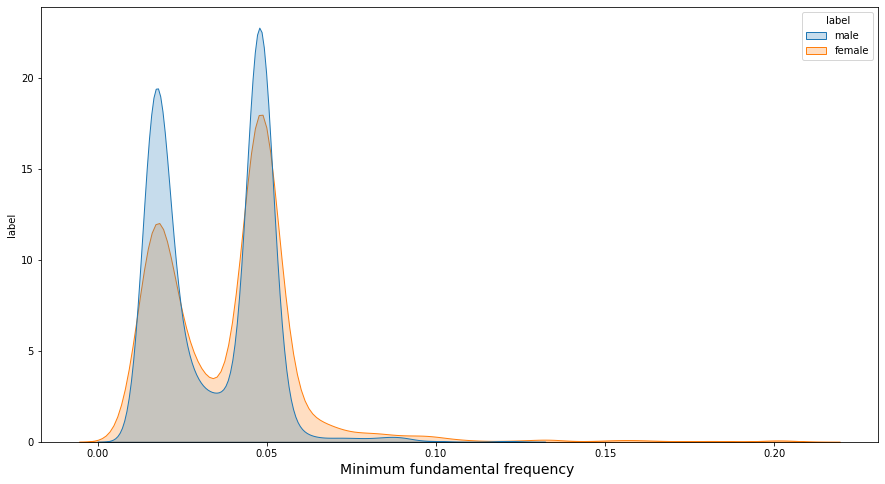

In [72]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='minfun', hue='label', shade=True,data=train_df)
plt.xlabel("Minimum fundamental frequency ",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "meanfreq" Variable playes important role on Dependant Variable "label"

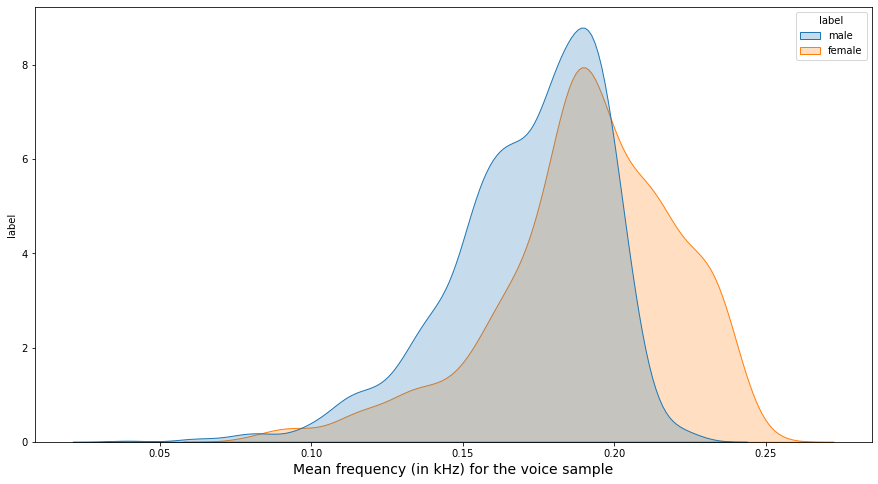

In [68]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='meanfreq', hue='label', shade=True,data=train_df)
plt.xlabel("Mean frequency (in kHz) for the voice sample",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "sd" Variable playes important role on Dependant Variable "label"

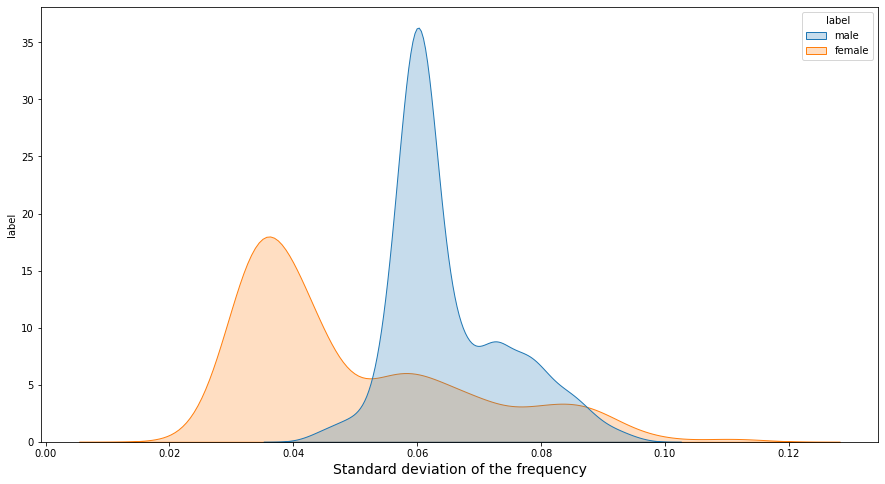

In [69]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='sd', hue='label', shade=True,data=train_df)
plt.xlabel("Standard deviation of the frequency",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "Q25" Variable playes important role on Dependant Variable "label"

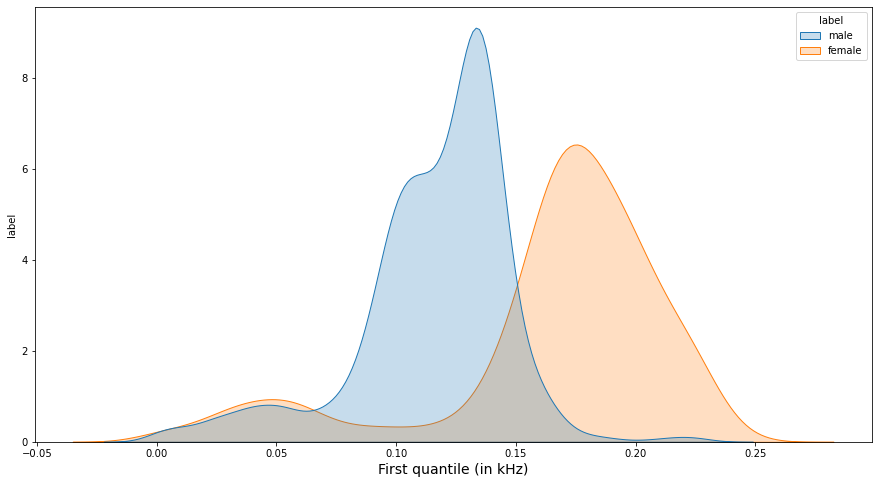

In [53]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='Q25', hue='label', shade=True,data=train_df)
plt.xlabel("First quantile (in kHz)",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "mode" Variable playes important role on Dependant Variable "label"

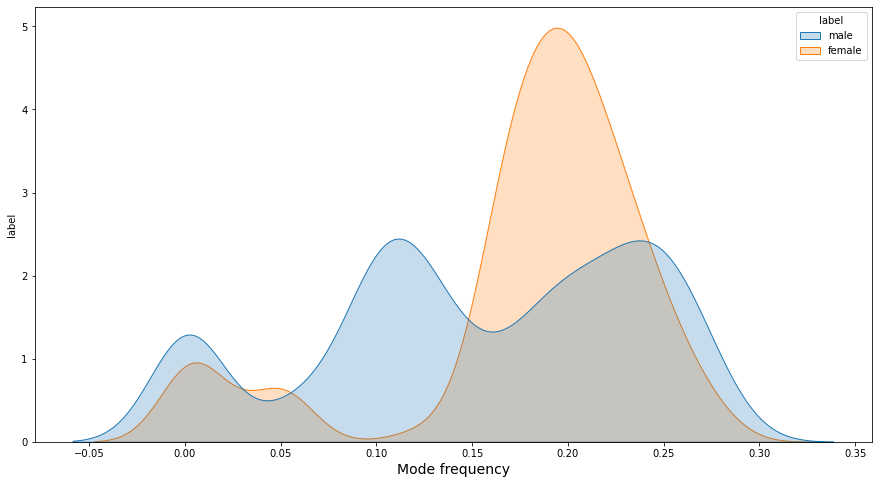

In [54]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='mode', hue='label', shade=True,data=train_df)
plt.xlabel("Mode frequency",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "centroid" Variable playes important role on "label" variable

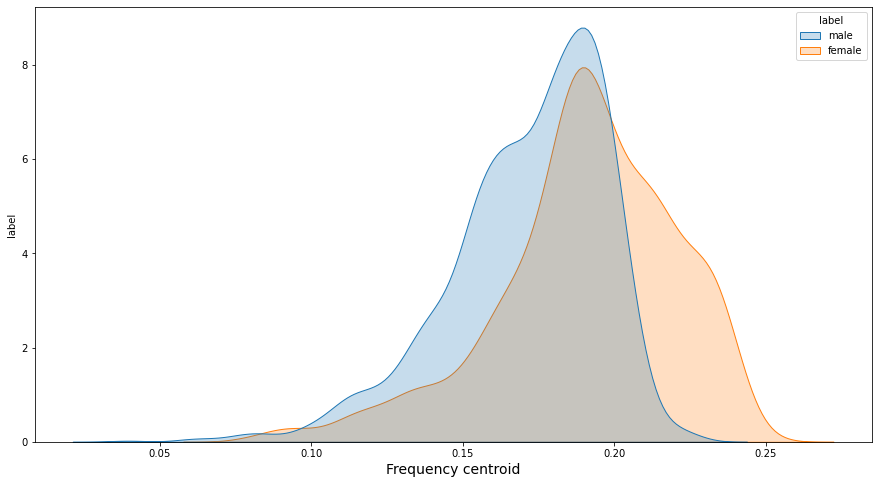

In [55]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='centroid', hue='label', shade=True,data=train_df)
plt.xlabel("Frequency centroid",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## How Does "dfrange" Variable playes important role on "label" variable

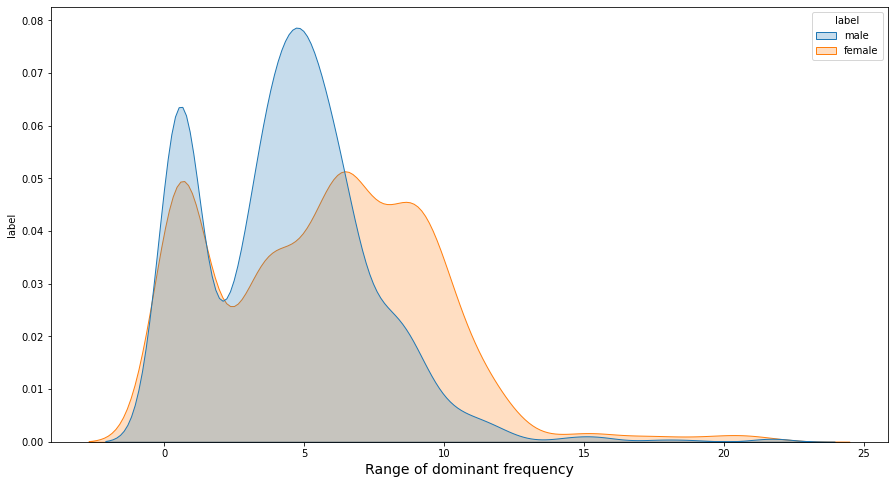

In [57]:
plt.figure(figsize=[15,8])
sns.kdeplot(x='dfrange', hue='label', shade=True,data=train_df)
plt.xlabel("Range of dominant frequency",size=14)
plt.ylabel("label")
plt.title("")
plt.show()

## **Observation**

- From The Above Observation **meandom, dfrange , minfun, Centroid, Mode, Q25, sd, Meanfrq** have important role to differentiate between male and female voice
- That Variable Highly Co-related with Dependant Variable **label**

<a name = Section7></a>

---
# **7. Post Data Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- Encoding The Categorical Value

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lc = LabelEncoder()

In [14]:
train_df['label'] = lc.fit_transform(train_df['label'])

- After Encoding in **lable** variable 1 is for a male & 0 is for a female

<a name = Section73></a>
### **7.2 Data Preparation**

- Split Our Data into Input and Output formate

In [15]:
X = train_df.drop(labels=["label"] , axis=1)
Y = train_df.label

In [16]:
X.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095


In [17]:
X.skew()

Id         -0.001228
meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64

- Splitting Data into **Training** and **Testing sets**

In [18]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', Y_test.shape)

X_train shape:  (2280, 21)
y_train shape:  (2280,)
X_test shape:  (571, 21)
y_test shape:  (571,)


<a name = Section72></a>
### **7.3 Data Scaling**

- In this section, we will scale our features to ensure that it one feature doesn't have more impact than others in terms of weights.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [22]:
X_test.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [23]:
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [24]:
X_train.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-1.169923,-1.077840,0.867709,-1.180294,-0.963106,-0.907157,0.596131,-0.313502,-0.218445,1.522179,1.780343,-0.911994,-1.077840,-1.602746,-0.803353,0.272221,-0.674338,-0.709492,-0.069956,-0.057093,-0.181503
1,-0.121831,0.709926,0.242871,0.657907,0.499706,1.417676,0.207447,-0.233650,-0.210169,0.780197,0.629099,1.323994,0.709926,-0.848482,-0.919448,-1.410975,0.492408,-0.709492,0.178303,0.191183,0.023503
2,1.673644,-0.574846,-0.082102,-0.542526,0.399096,-1.256975,-1.138044,0.824119,0.178151,-0.532644,0.184981,-0.011673,-0.574846,0.364241,-1.173357,-2.446274,-1.218338,-0.293288,-1.243597,-1.238360,-0.630367
3,-1.087612,-0.330378,-0.085710,0.004694,-0.414210,-0.314353,0.297742,-0.176821,-0.201106,0.124676,-0.422204,-2.153221,-0.330378,-0.765073,-0.948484,0.579010,-1.190214,-0.709492,-0.998133,-0.985331,-0.952927
4,-1.165533,-1.616181,1.599368,-1.680697,-1.357771,-0.352928,1.345688,6.442470,8.000478,0.251767,0.918612,-2.153221,-1.616181,-1.469695,-0.727018,-1.210594,-1.559854,-0.709492,-1.434265,-1.421492,-1.451788


In [25]:
X_test.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1.325753,1.312019,-1.727637,0.940866,1.456896,0.396115,-1.461649,0.008749,-0.159172,-2.474304,-1.522139,0.723216,1.312019,1.917643,0.997345,0.629151,0.373139,-0.467128,1.843448,1.853369,-1.083269
1,-0.637011,0.424202,-0.135246,0.313601,0.188223,0.856083,0.268077,-0.572967,-0.232642,0.591769,-0.375359,1.315987,0.424202,-0.305100,0.459647,0.464357,-0.234424,-0.467128,0.949266,0.958199,-1.048589
2,1.023705,0.854378,-1.390419,0.574557,0.992601,0.162734,-1.056660,-0.121176,-0.160232,-0.617641,-1.196941,0.513785,0.854378,1.101407,0.464321,0.629151,0.363281,-0.467128,1.315945,1.325283,-0.880985
3,-1.303067,0.030699,0.871952,0.185818,-0.174146,0.857392,0.688299,-0.420871,-0.219368,1.191588,1.343197,0.986674,0.030699,-0.741809,-0.030878,-0.235509,-0.291646,-0.721505,0.140858,0.153191,-0.542592
4,0.971703,0.583342,-0.627836,0.371917,0.865983,-0.000187,-1.002571,0.126724,-0.088538,-0.477534,-0.273865,0.242084,0.583342,0.587776,0.452671,0.518657,0.755006,-0.467128,0.923535,0.932439,-0.677098


In [26]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', Y_test.shape)

X_train shape:  (2280, 21)
y_train shape:  (2280,)
X_test shape:  (571, 21)
y_test shape:  (571,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---


<a name = Section81></a>
### **8.1 Model Development & Evaluation without tuning**

In [27]:
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances

In [28]:
clfs = [LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,solver='saga'),
      RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=250, class_weight='balanced'),
      DecisionTreeClassifier(),
      GaussianNB()]
for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, Y_train)

  # Make predictions using test data
  Y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  Y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(Y_train, Y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(Y_test, Y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

Performance Metric of LogisticRegression :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9964973730297724
----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 1.0
----------------------------------------

Performance Metric of DecisionTreeClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9912434325744308
----------------------------------------

Performance Metric of GaussianNB :
[Train Accuracy]: 0.9578947368421052
[Test Accuracy]: 0.9597197898423818
----------------------------------------



### Logestic Regression Without Tunning

In [29]:
loreg = LogisticRegression()
loreg.fit(X_train,Y_train)
Y_train_Pred_Loreg=loreg.predict(X_train)
Y_test_Pred_Loreg=loreg.predict(X_test)

In [30]:
train_report = classification_report(Y_train,Y_train_Pred_Loreg)
test_report = classification_report(Y_test , Y_test_Pred_Loreg)
print("     Train Report  ")
print(train_report)
print("     Test Report  ")
print(test_report)

     Train Report  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1145
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280

     Test Report  
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       287
           1       0.99      1.00      1.00       284

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



<a name = Section82></a>
### **8.2 Hyperparameter Tuning of Models**

### Logestic Regression Model

In [31]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [32]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train )

In [35]:
grid_result.best_score_

0.9998538011695907

In [36]:
grid_result.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [37]:
LG = LogisticRegression(penalty='l2' , solver='newton-cg' , C=10)

In [38]:
LG.fit(X_train , Y_train)
pred_LG = LG.predict(X_test)

In [39]:
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix

In [40]:
acc_score_LG = accuracy_score(Y_test ,pred_LG)
conf_matrix_LG = confusion_matrix(Y_test , pred_LG)
class_rep_LG = classification_report(Y_test , pred_LG)
print("                 Testing Accuracy                ")
print(conf_matrix_LG)
print(class_rep_LG)

                 Testing Accuracy                
[[286   1]
 [  0 284]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       284

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [41]:
pred_LG_train = LG.predict(X_train)

In [42]:
acc_score_LG_train = accuracy_score(Y_train ,pred_LG_train)
conf_matrix_LG_train = confusion_matrix(Y_train , pred_LG_train)
class_rep_LG_train = classification_report(Y_train , pred_LG_train)
print("                 Trainig Accuracy                ")
print(conf_matrix_LG_train)
print(class_rep_LG_train)

                 Trainig Accuracy                
[[1145    0]
 [   0 1135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1145
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280



### GaussianNB Model

In [43]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, Y_train)

gs_NB.best_params_

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


{'var_smoothing': 0.0012328467394420659}

In [44]:
gs_NB.best_params_

{'var_smoothing': 0.0012328467394420659}

In [45]:
GB =GaussianNB(var_smoothing= 0.0012328467394420659) 

In [46]:
GB.fit(X_train , Y_train)

GaussianNB(var_smoothing=0.0012328467394420659)

In [47]:
GB_pred_train=GB.predict(X_train)
GB_pred_test=GB.predict(X_test)

In [48]:
acc_score_GB = accuracy_score(Y_test ,GB_pred_test)
conf_matrix_GB = confusion_matrix(Y_test ,GB_pred_test)
class_rep_GB = classification_report(Y_test , GB_pred_test)
print(conf_matrix_GB)
print(class_rep_GB)

[[274  13]
 [ 10 274]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       287
           1       0.95      0.96      0.96       284

    accuracy                           0.96       571
   macro avg       0.96      0.96      0.96       571
weighted avg       0.96      0.96      0.96       571



<a name = Section83></a>
### **8.3 Implement Model on test data**

In [49]:
# test_df=pd.read_csv(".....\\Machine Learning\\Term_Project_2\\voice_test.csv")

In [50]:
test_df.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


In [51]:
test_df.shape

(317, 21)

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        317 non-null    int64  
 1   meanfreq  317 non-null    float64
 2   sd        317 non-null    float64
 3   median    317 non-null    float64
 4   Q25       317 non-null    float64
 5   Q75       317 non-null    float64
 6   IQR       317 non-null    float64
 7   skew      317 non-null    float64
 8   kurt      317 non-null    float64
 9   sp.ent    317 non-null    float64
 10  sfm       317 non-null    float64
 11  mode      317 non-null    float64
 12  centroid  317 non-null    float64
 13  meanfun   317 non-null    float64
 14  minfun    317 non-null    float64
 15  maxfun    317 non-null    float64
 16  meandom   317 non-null    float64
 17  mindom    317 non-null    float64
 18  maxdom    317 non-null    float64
 19  dfrange   317 non-null    float64
 20  modindx   317 non-null    float6

- No Missing Values in Test Dataset 

In [53]:
X.shape

(2851, 21)

In [54]:
test_df.shape

(317, 21)

In [55]:
GB.fit(X , Y)

GaussianNB(var_smoothing=0.0012328467394420659)

In [56]:
GB_test_df_pred = GB.predict(test_df)

In [57]:
GB_test_df_prob = GB.predict_proba(test_df)

In [58]:
GB_test_df_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [59]:
GB_test_df_prob

array([[9.91200860e-01, 8.79914048e-03],
       [4.94853064e-02, 9.50514694e-01],
       [4.31227028e-05, 9.99956877e-01],
       [9.99995986e-01, 4.01433652e-06],
       [9.95343919e-01, 4.65608057e-03],
       [9.64549324e-01, 3.54506756e-02],
       [2.55176219e-04, 9.99744824e-01],
       [3.58301330e-04, 9.99641699e-01],
       [9.99966730e-01, 3.32700608e-05],
       [1.04499784e-03, 9.98955002e-01],
       [9.97968244e-01, 2.03175552e-03],
       [9.99347372e-01, 6.52628471e-04],
       [9.97524195e-01, 2.47580493e-03],
       [9.99984828e-01, 1.51716184e-05],
       [9.99972511e-01, 2.74889956e-05],
       [9.98903055e-01, 1.09694510e-03],
       [9.96254280e-01, 3.74572017e-03],
       [9.99966022e-01, 3.39777486e-05],
       [9.99597724e-01, 4.02275842e-04],
       [1.21186071e-03, 9.98788139e-01],
       [9.94506454e-01, 5.49354625e-03],
       [9.94624088e-01, 5.37591240e-03],
       [1.70578573e-02, 9.82942143e-01],
       [9.99977581e-01, 2.24190806e-05],
       [2.260620

In [60]:
ID_list=test_df.Id.tolist()

In [61]:
Sample1 = pd.DataFrame(list(zip(ID_list,GB_test_df_pred)), columns=["ID" , "Predict"])

In [62]:
Sample1.head()

,ID,Predict
0,2148,0
1,1124,1
2,170,1
3,3158,0
4,2229,0


In [63]:
# Sample1.to_csv(".......\\Term_Project_2\\Submission.csv", index=False , header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We have learned the **working** of **GaussianNB Model** as a **classifier**.

- We have performed an **in-depth analysis** to extract important information regarding the **features** **concerning** **Gender Recognition**.

- We then proceeded to **scale** our **data** using a **StandardScaler** and then **split** our data into **train** and **test** datasets.

- We **trained different classifiers** and Check the **Accuracy**

- We also **performed tuning** on our **GaussianNB Model** and **Logestic Regression Model** classifier using Grid Search to find the **optimal model**.

- Now we can **use both** of these models in **production** and **monitor** the prediction **results** to **identify** the **best model** in realtime.

- Finally, we will **use the best model** to **solve** the **objective**.